<a href="https://colab.research.google.com/github/Segtanof/pyfin/blob/main/05_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization
Now that we learned to import and work with data(frames) we can look at some visualization tools. We will discuss pandas and seaborn plots. However, Python has a lot more libraries for data visualizations. Another famous one besides these two is [matplotlib](https://matplotlib.org/). It is often used in combination with the other two.

## Python is an object-oriented programming language

What does that mean? Every "thing" (e.g. integers, floats, lists, dicts, DataFrames) is an "object". We have seen that some objects have methods (e.g. DataFrame**.sum()**, list**.append()**, string**.lower()**), which are essentially functions associated with that specific object.

Objects can also have attributes (e.g. DataFrame**.shape**), which is essentially a property of that object.

Therefore, when we create a DataFrame via `pd.DataFrame`, we don't actually call a *function*, we instantiate an object of the type `DataFrame`. The correct term for this is creating an instance of the `DataFrame` **`class`**. How this works is however beyond the scope of this course.

The key thing to remember is that `DataFrame`s and other objects can keep state. I.e. if you add rows to a DataFrame, it will store the rows. A function on the other hand only returns its value and disappears together with all the variables in the local name space.

## Pandas Plots
Pandas allows us to make simple plots very quickly and easily.

In [1]:
import pandas as pd

Let's use some real world data. The authors of the paper Jensen, T., Kelly, B., and Pedersen, L. “Is There a Replication Crisis in Finance?” Journal of Finance (2023) provide [replication data](https://jkpfactors.com/factor-returns?country=usa&theme=all_factors&frequency=monthly&weight=vw_cap#) on [their website](https://jkpfactors.com/?country=usa&factor=all_factors).

`pandas` can directly import zipped CSV files from web links, which is very convenient. Let's try it.

In [ ]:
df = pd.read_csv(
    "https://jkpfactors.s3.amazonaws.com/public/%5Busa%5D_%5Ball_factors%5D_%5Bmonthly%5D_%5Bvw_cap%5D.zip",
    parse_dates=["date"] # Note that we are attempting to parse the dates in the column named 'date'
)

In [4]:
df1 = pd.read_csv(
    "https://jkpfactors.s3.amazonaws.com/public/%5Busa%5D_%5Ball_factors%5D_%5Bmonthly%5D_%5Bvw_cap%5D.zip")
df1

,location,name,freq,weighting,direction,n_stocks,n_stocks_min,date,ret
0,usa,age,monthly,vw_cap,-1,502,8,1926-03-31,-0.086738
1,usa,age,monthly,vw_cap,-1,505,12,1926-04-30,-0.000572
2,usa,age,monthly,vw_cap,-1,510,17,1926-05-31,-0.006332
3,usa,age,monthly,vw_cap,-1,512,21,1926-06-30,-0.003012
4,usa,age,monthly,vw_cap,-1,503,23,1926-07-31,0.003211
...,...,...,...,...,...,...,...,...,...
142779,usa,zero_trades_252d,monthly,vw_cap,1,3841,1554,2023-08-31,0.035940
142780,usa,zero_trades_252d,monthly,vw_cap,1,3832,1548,2023-09-30,0.015614
142781,usa,zero_trades_252d,monthly,vw_cap,1,3833,1547,2023-10-31,0.038328
142782,usa,zero_trades_252d,monthly,vw_cap,1,3826,1575,2023-11-30,-0.042901


In [3]:
# Let's check a random sample of rows
df.sample(5)

,location,name,freq,weighting,direction,n_stocks,n_stocks_min,date,ret
97690,usa,rd5_at,monthly,vw_cap,1,714,357,1976-09-30,-0.001808
126922,usa,seas_1_1na,monthly,vw_cap,1,728,355,1962-03-31,0.015195
47743,usa,fnl_gr1a,monthly,vw_cap,-1,1175,586,1967-02-28,-0.000114
45808,usa,eqpo_me,monthly,vw_cap,1,3256,1222,2022-05-31,0.079847
80926,usa,oaccruals_at,monthly,vw_cap,-1,3830,1798,2006-10-31,0.001532


Let's assume we don't like the column name `name`, and we want to rename it to `factor`. We can do that using the `.rename()` method. Because we want to rename a column, we use the keyword argument `columns`:

In [5]:
df = df.rename(columns = {'name':'factor'})
df.head()

,location,factor,freq,weighting,direction,n_stocks,n_stocks_min,date,ret
0,usa,age,monthly,vw_cap,-1,502,8,1926-03-31,-0.086738
1,usa,age,monthly,vw_cap,-1,505,12,1926-04-30,-0.000572
2,usa,age,monthly,vw_cap,-1,510,17,1926-05-31,-0.006332
3,usa,age,monthly,vw_cap,-1,512,21,1926-06-30,-0.003012
4,usa,age,monthly,vw_cap,-1,503,23,1926-07-31,0.003211


For now, we only want to work with a single factor: `cash_at`. So we use the `query` method to filter the data:

In [6]:
input_data = df.query("factor=='cash_at'")

In [7]:
input_data.head()

,location,factor,freq,weighting,direction,n_stocks,n_stocks_min,date,ret
19398,usa,cash_at,monthly,vw_cap,1,13,6,1950-11-30,-0.029287
19399,usa,cash_at,monthly,vw_cap,1,17,8,1950-12-31,-0.018404
19400,usa,cash_at,monthly,vw_cap,1,22,11,1951-01-31,0.019976
19401,usa,cash_at,monthly,vw_cap,1,33,16,1951-02-28,0.009224
19402,usa,cash_at,monthly,vw_cap,1,45,21,1951-03-31,-0.010539


We can make a chart (or a "plot") by calling the `plot` method.

<Axes: >

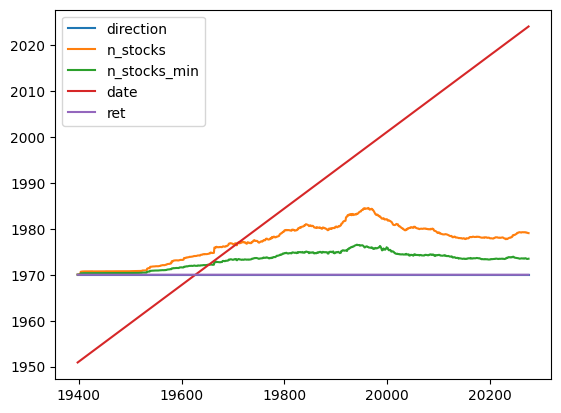

In [8]:
input_data.plot()

Well... it's a chart, but we can improve it by focusing on the relevant things. Let's only look at the number of stocks:

<Axes: >

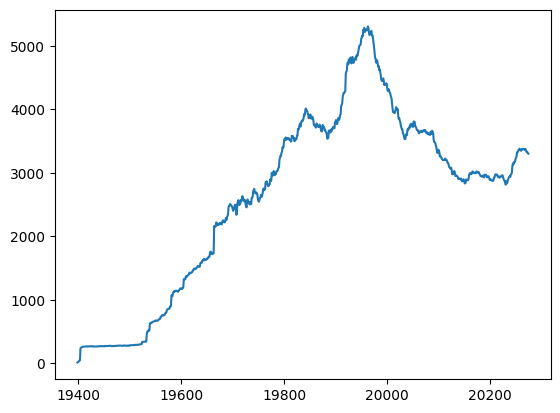

In [9]:
input_data['n_stocks'].plot()

Better! The x-axis still looks not like what we would want. Why is that? It's the index of the data. But we want to use the date as the x-axis. So let's manually fix the x-axis and plot it again. Instead of taking out a single column and plotting it, we are taking the full DataFrame and telling pandas which columns should go where. Let's plot both `n_stocks` and `n_stocks_min`.

<Axes: xlabel='date'>

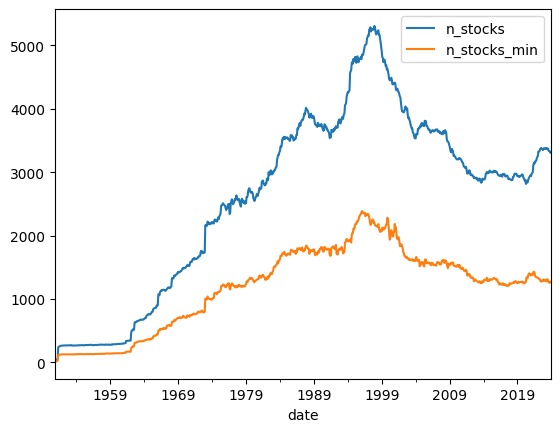

In [10]:
input_data.plot(x='date', y=['n_stocks', 'n_stocks_min'])

Now that looks a lot better!

**Quick exercise**

Plot the `n_stocks_min` against `n_stocks` as a scatterplot. Set the title to `Scatterplot` and use log-scaling for the y-axis. Check [the documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for hints.

<Axes: title={'center': 'scatter plot'}, xlabel='n_stocks_min', ylabel='n_stocks'>

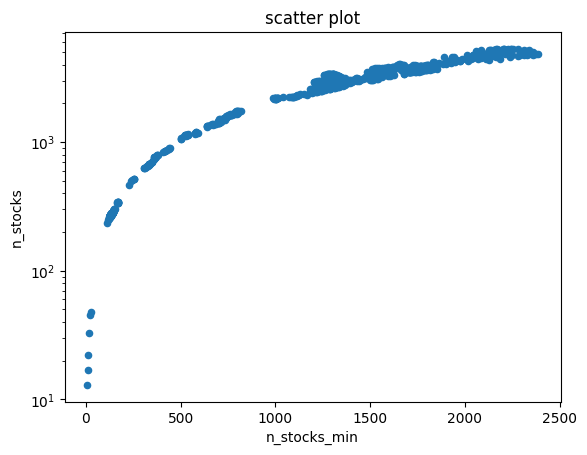

In [15]:
input_data.plot(x="n_stocks_min", y= "n_stocks", title= "scatter plot", kind = "scatter", logy = True)

## Seaborn Plots
The pandas library is very nice to use for some quick-and-dirty plots. For plots that you might want to put into your thesis, and some special types of plots, seaborn is the better choice.

To make them look nicer, we can choose styles. You can look [here](https://python-charts.com/seaborn/themes/) for some examples.

In [27]:
import seaborn as sns
sns.set_style("darkgrid") # This is important for making it look nicer!

In seaborn, we can simply use `pd.DataFrame` objects as data arguments to the plot functions. Using  [`lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html) we can create lineplots.

To pass data to the plot, we use the `data` argument:

<Axes: xlabel='date', ylabel='n_stocks'>

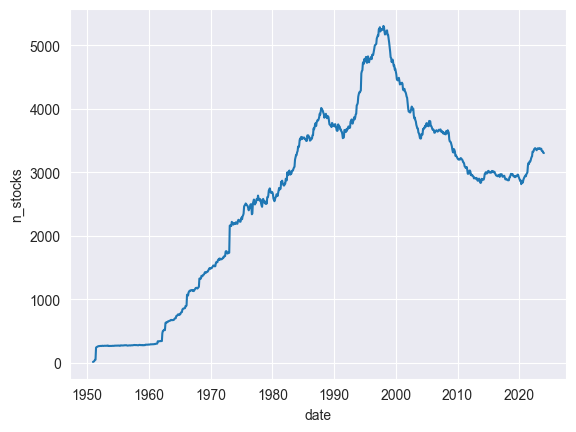

In [28]:
sns.lineplot(x="date",y="n_stocks",data=input_data)

using [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) we can create histograms

<Axes: xlabel='n_stocks', ylabel='Count'>

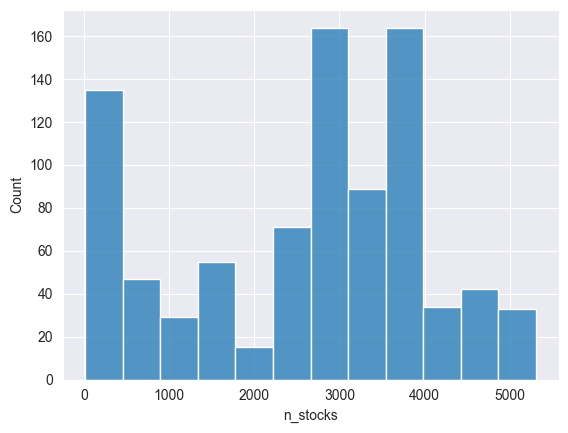

In [29]:
sns.histplot(
    x='n_stocks',
    data = input_data,
)

And using [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) we can create scatter plots. To color the dots based on their return (column `ret`), we can set the `hue` argument.

<Axes: xlabel='n_stocks_min', ylabel='n_stocks'>

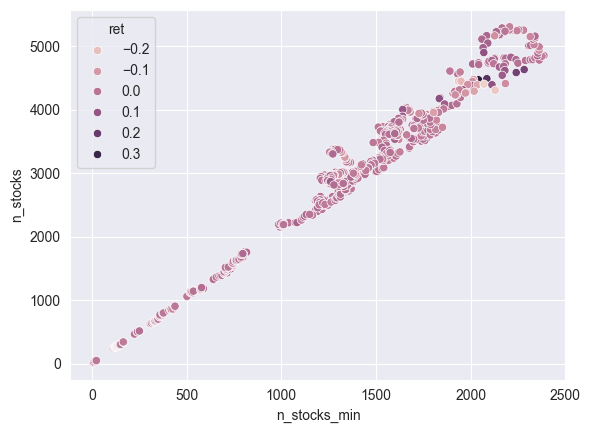

In [33]:
sns.scatterplot(x="n_stocks_min", y="n_stocks", hue='ret', data=input_data)

Another very useful type of plots is the [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html). We can use it for example to show a visual representatio of a correlation matrix.

In [34]:
correlation_matrix = input_data[['ret','n_stocks','n_stocks_min']].corr()
correlation_matrix

,ret,n_stocks,n_stocks_min
ret,1.000000,-0.005426,-0.003464
n_stocks,-0.005426,1.000000,0.991498
n_stocks_min,-0.003464,0.991498,1.000000


<Axes: >

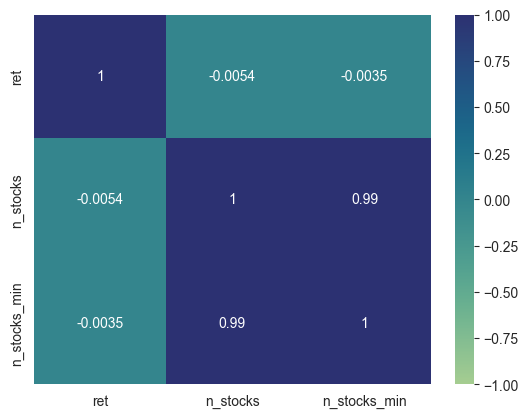

In [35]:
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap="crest")

<Axes: >

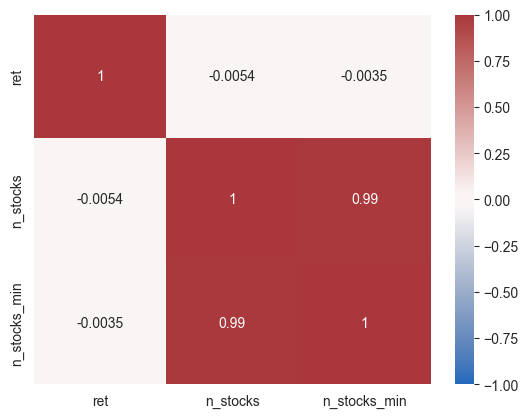

In [40]:
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap="vlag")

**Quick exercise**

- Check out available [color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) for seaborn.
- Plot the correlation heatmap using a diverging color palette.

## When to use matplotlib

matplotlib is the underlying package that pandas and seaborn rely on. They simply make it nicer and easier to use.

For some features, matplotlib still comes in very handy.

For example to plot a horizontal or vertical line at a specific point.

<Axes: xlabel='n_stocks_min', ylabel='n_stocks'>

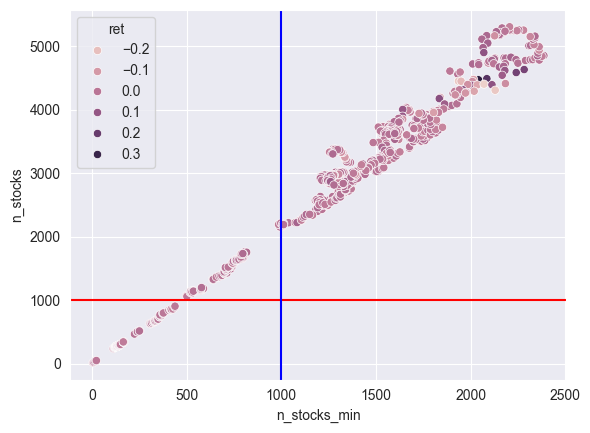

In [ ]:
fig = sns.scatterplot(x="n_stocks_min", y="n_stocks", hue='ret', data=input_data) # We need to store the plot into a variable that we can then modify and add features to

fig.axhline(y=1000, color='r') #sns is a function, while fig is an object. the function will execute then automatically show

fig.axvline(x=1000, color='b')


[]

## Exercises

a)
Filter the `df` dataframe so that it includes rows where "factor" is either "cash_at" or "debt_me".

- Create a seaborn plot of the n_stocks over time for each factor.
- Draw a seaborn histogram for the distribution of n_stocks for each of the two "factor".
- Create a seaborn scatterplot of "ret" (on x) and "n_stocks" (on y). Ensure that we have different markers and colors for the two different "factor". Use an appropriate type of color palette for this.


b)
- Take a random sample of 5 "factor"
- Filter the dataframe to rows corresponding to that "factor". Check the help for `query`. It tells you how to access variables.
- `pivot` the data, so that index is `date`, columns are `factor`, values are `ret`.
- Calculate the return correlation
- Plot it as heatmap; use an appropriate color palette

c)
- Take the simple lineplot from part a).
- Save the output to a PDF file. Check the type and then use the internet to find help.
- Download it to your computer and take a look.
- Turn your code for saving the plot into a function, which allows you to specify the filename.